In [20]:
!pip install mglearn

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import tensorflow as tf
from IPython.display import Image
from sklearn.cluster import KMeans
import mglearn
from sklearn.cluster import DBSCAN

In [47]:
moldset_labeled = pd.read_csv(r'./molding9.csv', low_memory=False)
moldset_labeled

,idx,Machine_Name,Additional_Info_1,Additional_Info_2,TimeStamp,Shot_Number,NGmark,Injection_Time,Filling_Time,Plasticizing_Time,...,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12,Clamp_open_time,Cavity
0,20.0,6i,09520 9000R,,2021-12-14 17:39:39,102889.0,1,7.89,3.89,23.820000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,21.0,6i,09520 9000R,,2021-12-14 17:40:27,102890.0,1,7.89,3.89,23.809999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22.0,6i,09520 9000R,,2021-12-14 17:41:34,102891.0,1,7.89,3.89,23.770000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,23.0,6i,09520 9000R,,2021-12-14 17:42:40,102892.0,1,7.89,3.89,23.760000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24.0,6i,09520 9000R,,2021-12-14 17:43:47,102893.0,1,7.87,3.87,23.780001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73554,73555.0,6i,09520 9000R,,2022-03-24 14:00:56,176608.0,1,9.59,3.59,26.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73555,73556.0,6i,09520 9000R,,2022-03-24 14:02:03,176609.0,1,9.60,3.60,26.389999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73556,73557.0,6i,09520 9000R,,2022-03-24 14:03:09,176610.0,1,9.58,3.58,26.340000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73557,73558.0,6i,09520 9000R,,2022-03-24 14:04:16,176611.0,1,9.60,3.60,26.370001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
moldset_labeled_211215 = moldset_labeled.iloc[362:1629,5:30]
moldset_labeled_211215 = moldset_labeled_211215.reset_index(drop=True)
moldset_labeled_211215

,Shot_Number,NGmark,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,...,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7
0,103232.0,1,7.88,3.88,23.809999,66.699997,5.11,26.700001,27.0,166.199997,...,106.900002,24.799999,22.400000,198.399994,200.100006,224.699997,216.500000,207.800003,189.800003,38.000000
1,103233.0,1,7.85,3.85,23.850000,66.599998,5.11,26.700001,27.0,166.199997,...,107.199997,24.799999,22.400000,198.199997,199.600006,224.600006,216.300003,207.600006,189.800003,38.299999
2,103234.0,1,7.87,3.87,23.840000,66.599998,5.10,26.700001,27.0,166.199997,...,107.000000,25.000000,22.400000,197.300003,199.500000,224.699997,216.300003,207.899994,189.800003,38.500000
3,103235.0,1,7.88,3.88,23.850000,66.599998,5.11,26.700001,27.0,166.199997,...,106.800003,24.799999,22.400000,198.399994,199.500000,225.000000,216.399994,207.899994,190.000000,38.500000
4,103236.0,1,7.86,3.86,23.900000,66.599998,5.11,26.700001,27.0,166.100006,...,106.599998,24.900000,22.400000,198.100006,199.899994,225.199997,216.500000,207.899994,190.000000,38.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,104496.0,1,8.18,4.18,24.180000,66.900002,5.11,25.799999,26.0,166.199997,...,97.800003,25.100000,22.400000,198.300003,200.699997,225.300003,216.800003,208.000000,190.000000,40.599998
1263,104497.0,1,8.19,4.19,24.209999,66.900002,5.11,25.799999,26.0,166.100006,...,98.000000,24.799999,22.400000,198.000000,200.600006,225.300003,216.699997,208.000000,189.899994,40.799999
1264,104498.0,1,8.16,4.16,24.209999,66.900002,5.11,25.799999,26.0,166.199997,...,98.300003,24.799999,22.400000,197.300003,199.899994,225.300003,216.699997,208.000000,190.000000,40.900002
1265,104499.0,1,8.16,4.16,24.200001,66.900002,5.12,25.799999,26.0,166.199997,...,99.000000,24.799999,22.299999,198.699997,199.500000,225.500000,216.899994,208.100006,190.199997,41.299999


In [49]:
moldset_labeled_211215_std = StandardScaler().fit_transform(moldset_labeled_211215.iloc[:,:])
moldset_labeled_211215_std

array([[-1.72914997,  0.        , -1.12333924, ..., -1.27804214,
        -1.38615153, -1.72501403],
       [-1.72642003,  0.        , -1.29295255, ..., -2.58075984,
        -1.38615153, -1.42366456],
       [-1.7236901 ,  0.        , -1.17987791, ..., -0.62673299,
        -1.38615153, -1.22276364],
       ...,
       [ 1.72695223,  0.        ,  0.45970572, ...,  0.02467556,
        -0.00815526,  1.18803975],
       [ 1.72968217,  0.        ,  0.45970572, ...,  0.6760841 ,
         1.36984101,  1.58983776],
       [ 1.73241211,  0.        ,  0.62931634, ...,  1.32739326,
         0.68089544,  1.79073868]])

In [50]:
pca = PCA(n_components = 2)
PC = pca.fit_transform(moldset_labeled_211215_std)

VarRatio = pca.explained_variance_ratio_
VarRatio = pd.DataFrame(np.round_(VarRatio,3))

CumVarRatio = np.cumsum(pca.explained_variance_ratio_)
CumVarRatio_df = pd.DataFrame(np.round_(CumVarRatio,3))

Result = pd.concat([VarRatio, CumVarRatio_df],axis = 1)
Result

,0,0
0,0.320,0.320
1,0.118,0.438


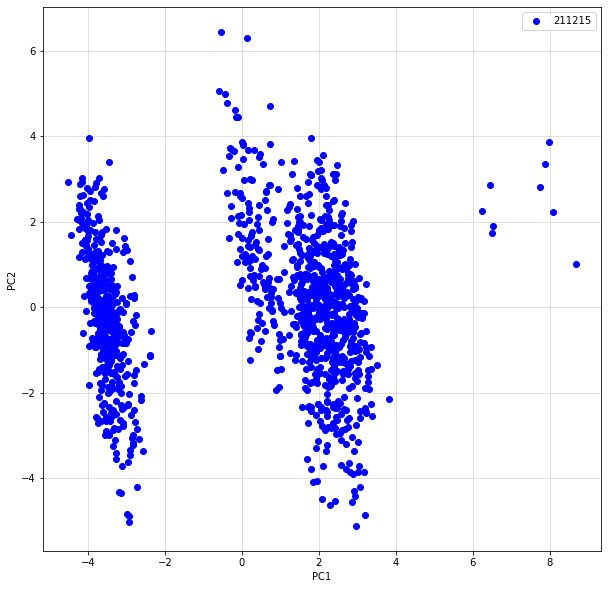

In [51]:
plt.figure(figsize = (10,10))
plt.plot(PC[:,0],PC[:,1], color='b',linestyle='',marker='o',label='211215')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.5)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'feature_names'

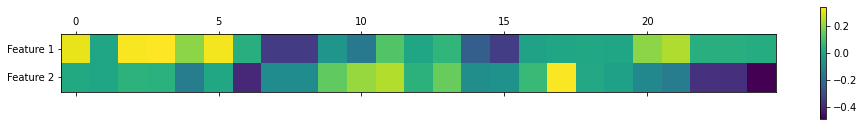

In [27]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["Feature 1","Feature 2"])
plt.colorbar()
plt.xticks(range(len(moldset_labeled_211215.feature_names)),moldset_labeled_211215.feature_names,rotation=60,ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

No handles with labels found to put in legend.


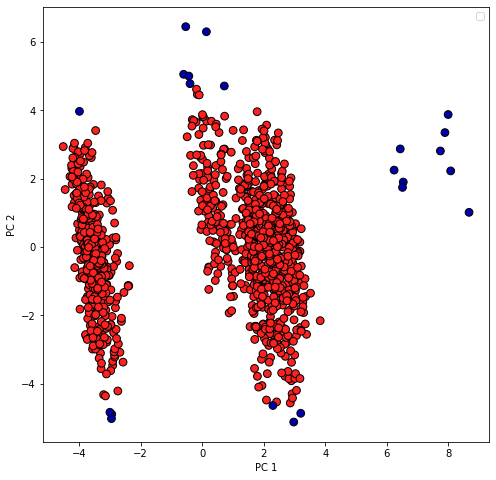

In [79]:
plt.figure(figsize = (8, 8))
dbscan = DBSCAN(eps = 0.9,min_samples=20)
clusters = dbscan.fit_predict(PC)
plt.scatter(PC[:,0],PC[:,1],c=clusters ,cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()

In [81]:
a=0
for i in range(clusters.shape[0]):
  if clusters[i]==-1:
    a+=1
a

22

In [82]:
pd.DataFrame(clusters)

,0
0,0
1,0
2,0
3,0
4,0
...,...
1262,1
1263,1
1264,1
1265,1


In [83]:
Result = pd.concat([moldset_labeled_211215,pd.DataFrame(clusters)],axis=1)
Result

,Shot_Number,NGmark,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,...,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,0
0,103232.0,1,7.88,3.88,23.809999,66.699997,5.11,26.700001,27.0,166.199997,...,24.799999,22.400000,198.399994,200.100006,224.699997,216.500000,207.800003,189.800003,38.000000,0
1,103233.0,1,7.85,3.85,23.850000,66.599998,5.11,26.700001,27.0,166.199997,...,24.799999,22.400000,198.199997,199.600006,224.600006,216.300003,207.600006,189.800003,38.299999,0
2,103234.0,1,7.87,3.87,23.840000,66.599998,5.10,26.700001,27.0,166.199997,...,25.000000,22.400000,197.300003,199.500000,224.699997,216.300003,207.899994,189.800003,38.500000,0
3,103235.0,1,7.88,3.88,23.850000,66.599998,5.11,26.700001,27.0,166.199997,...,24.799999,22.400000,198.399994,199.500000,225.000000,216.399994,207.899994,190.000000,38.500000,0
4,103236.0,1,7.86,3.86,23.900000,66.599998,5.11,26.700001,27.0,166.100006,...,24.900000,22.400000,198.100006,199.899994,225.199997,216.500000,207.899994,190.000000,38.599998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,104496.0,1,8.18,4.18,24.180000,66.900002,5.11,25.799999,26.0,166.199997,...,25.100000,22.400000,198.300003,200.699997,225.300003,216.800003,208.000000,190.000000,40.599998,1
1263,104497.0,1,8.19,4.19,24.209999,66.900002,5.11,25.799999,26.0,166.100006,...,24.799999,22.400000,198.000000,200.600006,225.300003,216.699997,208.000000,189.899994,40.799999,1
1264,104498.0,1,8.16,4.16,24.209999,66.900002,5.11,25.799999,26.0,166.199997,...,24.799999,22.400000,197.300003,199.899994,225.300003,216.699997,208.000000,190.000000,40.900002,1
1265,104499.0,1,8.16,4.16,24.200001,66.900002,5.12,25.799999,26.0,166.199997,...,24.799999,22.299999,198.699997,199.500000,225.500000,216.899994,208.100006,190.199997,41.299999,1


In [85]:
Result.to_csv("9000R_211215.csv",index=None)

In [ ]:
##라이브러리 선언

from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 100)

In [86]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import export_png

def draw_figure(x, y, title, show_figure=True,
    colors = 'firebrick darksalmon lightseagreen'.split()):

    p = figure(width=400, height=400, title=title)
    for c in range(n_classes):
        idx = np.where(y == c)[0]
        x_ = x[idx]
        p.scatter(x_[:,0], x_[:,1], fill_color=colors[c], line_color=colors[c])
    if show_figure:
        show(p)
    return p

In [91]:
import time
time_start   = time.time()
tsne         = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500, random_state=1)
tsne_results = tsne.fit_transform(moldset_labeled_211215_std)


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1267 samples in 0.000s...
[t-SNE] Computed neighbors for 1267 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1267
[t-SNE] Computed conditional probabilities for sample 1267 / 1267
[t-SNE] Mean sigma: 1.172206
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.391060
[t-SNE] KL divergence after 500 iterations: 1.188311


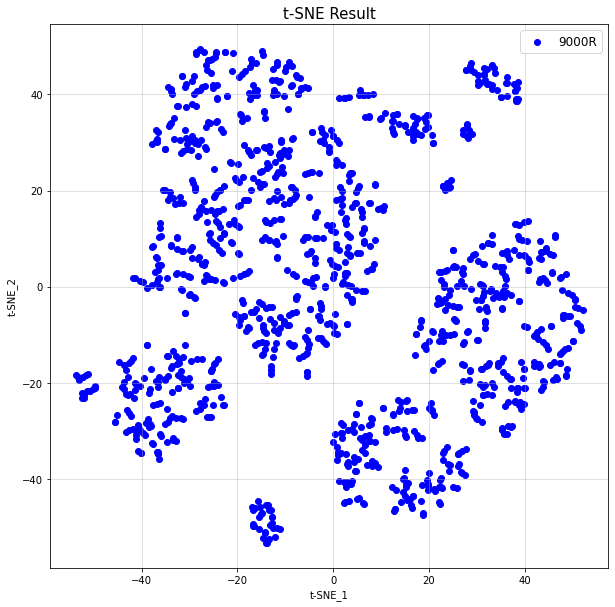

In [92]:
NoOfData = int(tsne_results.shape[0]/2)
plt.figure(figsize=(10,10))

plt.scatter(tsne_results[:,0],tsne_results[:,1], marker='o', label='9000R', c='b')
plt.title('t-SNE Result', fontsize=15)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.xlabel('t-SNE_1')
plt.ylabel('t-SNE_2')

plt.show()

No handles with labels found to put in legend.


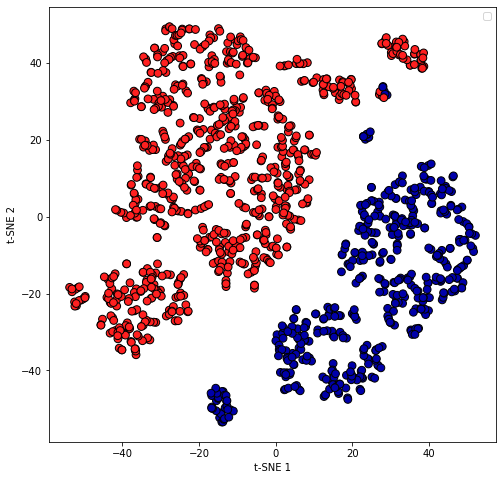

In [175]:
plt.figure(figsize = (8, 8))
dbscan = DBSCAN(eps = 7.5,min_samples=20)
clusters_tsne = dbscan.fit_predict(tsne_results)
plt.scatter(tsne_results[:,0],tsne_results[:,1],c=clusters_tsne ,cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()

In [176]:
a=0
for i in range(clusters_tsne.shape[0]):
  if clusters_tsne[i]==-1:
    a+=1
a

14

In [105]:
Result_tsne = pd.concat([moldset_labeled_211215,pd.DataFrame(clusters_tsne)],axis=1)
Result_tsne

,Shot_Number,NGmark,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,...,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,0
0,103232.0,1,7.88,3.88,23.809999,66.699997,5.11,26.700001,27.0,166.199997,...,24.799999,22.400000,198.399994,200.100006,224.699997,216.500000,207.800003,189.800003,38.000000,0
1,103233.0,1,7.85,3.85,23.850000,66.599998,5.11,26.700001,27.0,166.199997,...,24.799999,22.400000,198.199997,199.600006,224.600006,216.300003,207.600006,189.800003,38.299999,1
2,103234.0,1,7.87,3.87,23.840000,66.599998,5.10,26.700001,27.0,166.199997,...,25.000000,22.400000,197.300003,199.500000,224.699997,216.300003,207.899994,189.800003,38.500000,1
3,103235.0,1,7.88,3.88,23.850000,66.599998,5.11,26.700001,27.0,166.199997,...,24.799999,22.400000,198.399994,199.500000,225.000000,216.399994,207.899994,190.000000,38.500000,1
4,103236.0,1,7.86,3.86,23.900000,66.599998,5.11,26.700001,27.0,166.100006,...,24.900000,22.400000,198.100006,199.899994,225.199997,216.500000,207.899994,190.000000,38.599998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,104496.0,1,8.18,4.18,24.180000,66.900002,5.11,25.799999,26.0,166.199997,...,25.100000,22.400000,198.300003,200.699997,225.300003,216.800003,208.000000,190.000000,40.599998,6
1263,104497.0,1,8.19,4.19,24.209999,66.900002,5.11,25.799999,26.0,166.100006,...,24.799999,22.400000,198.000000,200.600006,225.300003,216.699997,208.000000,189.899994,40.799999,6
1264,104498.0,1,8.16,4.16,24.209999,66.900002,5.11,25.799999,26.0,166.199997,...,24.799999,22.400000,197.300003,199.899994,225.300003,216.699997,208.000000,190.000000,40.900002,6
1265,104499.0,1,8.16,4.16,24.200001,66.900002,5.12,25.799999,26.0,166.199997,...,24.799999,22.299999,198.699997,199.500000,225.500000,216.899994,208.100006,190.199997,41.299999,7


In [106]:
Result_tsne.to_csv("9000R_211215_tsne.csv",index=None)

In [132]:
from sklearn.manifold import MDS

mds_results = MDS(n_components=2).fit_transform(moldset_labeled_211215_std) 
mds_results=pd.DataFrame(mds_results)

In [133]:
mds_results

,0,1
0,-3.988104,3.430042
1,-4.822017,3.608554
2,-5.129035,3.254113
3,-4.252508,1.984537
4,-4.056434,0.982389
...,...,...
1262,1.531116,0.239335
1263,2.319474,-0.630506
1264,1.161095,-1.476958
1265,5.741445,-1.103119


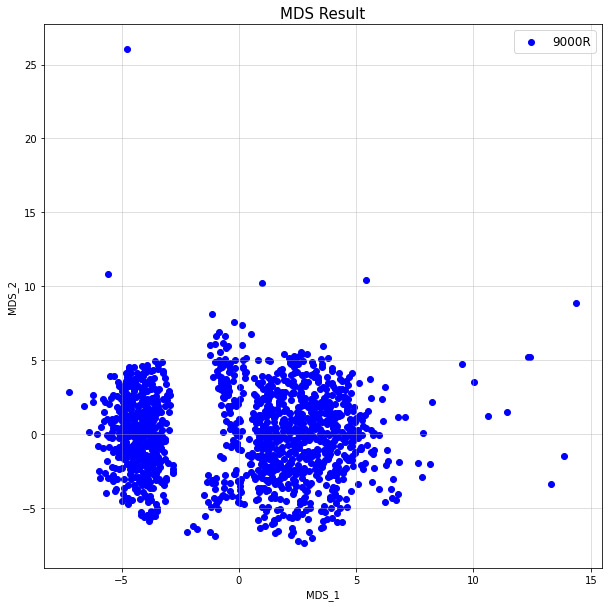

In [134]:
plt.figure(figsize=(10,10))

plt.scatter(mds_results.iloc[:,0],mds_results.iloc[:,1], marker='o', label='9000R', c='b')
plt.title('MDS Result', fontsize=15)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.xlabel('MDS_1')
plt.ylabel('MDS_2')

plt.show()

No handles with labels found to put in legend.


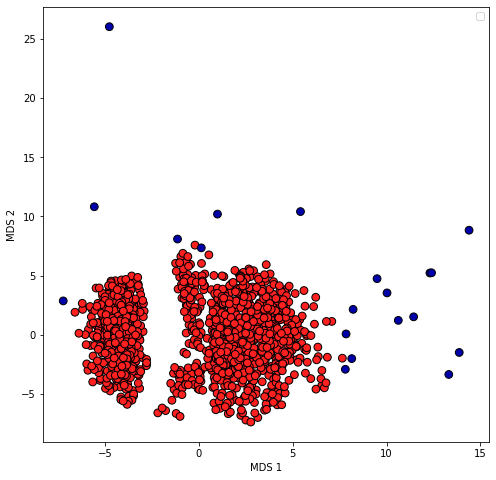

In [151]:
plt.figure(figsize = (8, 8))
dbscan = DBSCAN(eps = 1,min_samples=5)
clusters_mds = dbscan.fit_predict(mds_results)
plt.scatter(mds_results.iloc[:,0],mds_results.iloc[:,1],c=clusters_mds ,cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.legend()

In [152]:
b=0
for i in range(clusters_mds.shape[0]):
  if clusters_mds[i]==-1:
    b+=1
b

20

In [153]:
Result_mds = pd.concat([moldset_labeled_211215,pd.DataFrame(clusters_mds)],axis=1)
Result_mds
Result_mds.to_csv("9000R_211215_mds.csv",index=None)